In [52]:
import os
import torch
import torch.nn as nn
import numpy as np
import time
import random
import math
import copy
from matplotlib import pyplot as plt

[[92.1  92.1  92.1  92.1  92.1  92.   92.   76.   29.1   6.48  9.93]
 [92.1  92.1  92.1  92.1  92.1  89.1  81.   76.9  51.9  40.07 17.3 ]
 [92.1  92.1  92.1  92.1  92.1  92.   92.   76.   29.1   6.48  9.93]
 [92.1  92.1  92.1  92.1  92.1  92.1  41.4  17.4   8.59 10.1   9.85]
 [92.1  92.1  92.1  92.1  92.1  90.2  40.8  27.    1.54  1.42  1.54]
 [92.1  92.1  92.1  92.1  92.1  92.1  41.4  17.4   8.59 10.1   9.85]
 [92.1  92.1  92.1  92.1  92.1  92.1  92.1  75.   47.3  15.1   7.21]
 [92.1  92.1  92.1  92.1  92.1  80.7  59.4  24.8  14.7   2.31  1.3 ]
 [92.1  92.1  92.1  92.1  92.1  92.1  92.1  75.   47.3  15.1   7.21]
 [92.14 92.14 92.14 92.14 92.14 92.18 89.79 74.64 50.69 33.14 20.46]
 [92.1  92.1  92.1  92.1  92.1  45.   13.   11.9   8.87  8.23  6.04]
 [92.14 92.14 92.14 92.14 92.14 92.18 89.79 74.64 50.69 33.14 20.46]
 [92.1  92.1  92.1  92.1  92.1  85.6  47.5   4.05  4.05  4.05  4.05]
 [92.1  92.1  92.1  92.1  92.1  91.   88.4  64.9  28.   17.3   7.98]]
[0.   0.1  0.2  0.3  0.4  0.5  0.

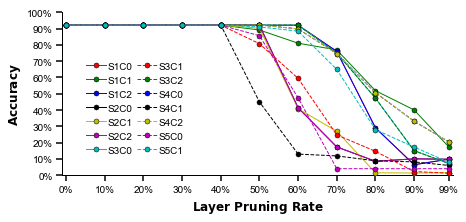

In [4]:
# Filter Pruning-Sensitivity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from cls_plt_fig import cls_plt_fig

fig_name ='../generate/Filter_Pruning_Sensitivity.svg'
Layers = ['S1C0','S1C1','S1C2','S2C0','S2C1','S2C2','S3C0','S3C1','S3C2','S4C0','S4C1','S4C2','S5C0','S5C1'] # 18
Sens = np.array([
[92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 91.9, 92.0, 92.0, 91.9, 91.9, 91.9, 91.8, 91.8, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 91.7, 91.7, 91.7, 76.2, 76.2, 76.0, 76.0, 76.0, 76.0, 60.9, 60.9, 23.2, 42.3, 42.3, 55.8, 55.8, 55.8, 29.1, 29.1, 19.6, 13.8, 13.8, 9.89, 8.83, 8.83, 6.48, 6.48, 6.48, 5.75, 6.93, 6.93, 6.85, 5.27, 5.27, 5.63, 9.93, 9.93], 
[92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 89.4, 89.4, 89.4, 89.1, 89.1, 89.1, 89.1, 83.8, 83.8, 83.8, 82.5, 82.5, 82.5, 81.0, 81.0, 81.0, 81.2, 81.2, 81.2, 76.1, 76.1, 76.1, 76.9, 76.9, 76.9, 56.4, 56.4, 56.4, 51.7, 51.7, 51.7, 51.7, 51.9, 51.9, 51.9, 56.3, 56.3, 56.3, 43.3, 43.3, 43.3, 40.0, 40.0, 40.07, 40.07, 36.22, 36.22, 36.22, 34.97, 34.97, 34.97, 17.30, 17.30], 
[92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 91.9, 92.0, 92.0, 91.9, 91.9, 91.9, 91.8, 91.8, 92.0, 92.0, 92.0, 92.0, 92.0, 92.0, 91.7, 91.7, 91.7, 76.2, 76.2, 76.0, 76.0, 76.0, 76.0, 60.9, 60.9, 23.2, 42.3, 42.3, 55.8, 55.8, 55.8, 29.1, 29.1, 19.6, 13.8, 13.8, 9.89, 8.83, 8.83, 6.48, 6.48, 6.48, 5.75, 6.93, 6.93, 6.85, 5.27, 5.27, 5.63, 9.93, 9.93], 
[92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 91.3, 91.3, 85.4, 79.4, 79.2, 76.9, 71.7, 46.7, 44.6, 41.4, 38.0, 37.5, 35.3, 36.9, 30.1, 33.5, 24.7, 20.5, 20.5, 17.4, 11.9, 12.6, 12.6, 8.35, 7.82, 7.13, 6.77, 6.73, 8.87, 8.59, 8.75, 8.75, 8.95, 9.0, 9.32, 9.48, 8.63, 9.68, 10.1, 10.1, 9.32, 9.44, 9.32, 9.76, 9.68, 9.85, 9.60, 9.64, 9.85], 
[92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 89.3, 89.8, 89.8, 90.1, 90.2, 90.2, 88.6, 88.6, 89.0, 51.8, 51.8, 52.3, 42.8, 42.8, 40.8, 37.2, 37.2, 35.8, 35.8, 34.2, 32.2, 32.2, 28.6, 27.0, 27.0, 24.7, 20.9, 20.9, 19.2, 9.76, 9.76, 9.48, 9.48, 7.58, 1.54, 1.54, 1.3, 1.3, 1.3, 1.42, 1.42, 1.42, 1.42, 1.42, 1.42, 1.58, 1.58, 1.58, 1.58, 1.58, 1.58, 1.54, 1.54, 1.54], 
[92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 91.3, 91.3, 85.4, 79.4, 79.2, 76.9, 71.7, 46.7, 44.6, 41.4, 38.0, 37.5, 35.3, 36.9, 30.1, 33.5, 24.7, 20.5, 20.5, 17.4, 11.9, 12.6, 12.6, 8.35, 7.82, 7.13, 6.77, 6.73, 8.87, 8.59, 8.75, 8.75, 8.95, 9.0, 9.32, 9.48, 8.63, 9.68, 10.1, 10.1, 9.32, 9.44, 9.32, 9.76, 9.68, 9.85, 9.60, 9.64, 9.85], 
[92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 91.0, 90.7, 88.3, 87.5, 88.0, 86.1, 82.6, 75.0, 73.8, 67.7, 66.8, 64.1, 64.7, 63.1, 50.4, 53.7, 47.1, 47.3, 45.5, 46.1, 40.1, 36.3, 32.9, 20.1, 16.3, 16.0, 15.1, 15.1, 11.1, 10.4, 11.3, 12.8, 10.9, 8.39, 8.59, 7.29, 7.21], 
[92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.0, 91.9, 91.6, 91.7, 91.8, 80.7, 78.9, 79.8, 79.3, 67.0, 67.2, 65.1, 63.8, 61.7, 61.1, 59.4, 44.6, 43.9, 42.8, 33.3, 31.3, 30.8, 29.5, 26.6, 25.8, 24.8, 24.1, 22.7, 18.3, 17.1, 15.8, 15.9, 15.3, 15.2, 15.2, 14.7, 11.9, 12.4, 12.9, 12.8, 8.67, 7.13, 6.4, 5.88, 2.31, 2.31, 1.62, 1.54, 1.50, 1.38, 1.38, 1.22, 1.50, 1.38, 1.30], 
[92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 91.0, 90.7, 88.3, 87.5, 88.0, 86.1, 82.6, 75.0, 73.8, 67.7, 66.8, 64.1, 64.7, 63.1, 50.4, 53.7, 47.1, 47.3, 45.5, 46.1, 40.1, 36.3, 32.9, 20.1, 16.3, 16.0, 15.1, 15.1, 11.1, 10.4, 11.3, 12.8, 10.9, 8.39, 8.59, 7.29, 7.21], 
[92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.18, 92.18, 92.06, 92.06, 92.22, 91.17, 90.68, 90.96, 90.64, 89.75, 89.79, 89.42, 89.3, 87.8, 87.4, 85.13, 84.52, 83.23, 80.67, 77.15, 74.64, 75.24, 70.22, 66.77, 66.49, 59.72, 57.66, 55.27, 52.51, 52.47, 50.69, 47.93, 45.34, 42.83, 41.69, 39.42, 36.35, 33.67, 32.46, 33.14, 33.14, 30.96, 30.83, 29.38, 27.84, 26.01, 24.51, 24.35, 23.66, 20.46], 
[92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 91.9, 90.5, 88.0, 87.1, 76.9, 45.0, 30.9, 31.3, 33.1, 20.1, 16.9, 16.5, 15.7, 15.3, 13.5, 13.0, 13.1, 10.9, 12.5, 12.3, 12.0, 12.0, 12.1, 12.6, 11.8, 11.9, 11.8, 11.0, 11.3, 11.3, 11.2, 10.9, 10.6, 9.97, 9.97, 8.87, 8.87, 8.43, 8.31, 8.23, 8.18, 8.39, 8.14, 8.27, 8.23, 8.23, 8.31, 8.31, 8.27, 8.23, 7.94, 7.82, 7.62, 6.93, 6.04],
[92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.14, 92.18, 92.18, 92.06, 92.06, 92.22, 91.17, 90.68, 90.96, 90.64, 89.75, 89.79, 89.42, 89.3, 87.8, 87.4, 85.13, 84.52, 83.23, 80.67, 77.15, 74.64, 75.24, 70.22, 66.77, 66.49, 59.72, 57.66, 55.27, 52.51, 52.47, 50.69, 47.93, 45.34, 42.83, 41.69, 39.42, 36.35, 33.67, 32.46, 33.14, 33.14, 30.96, 30.83, 29.38, 27.84, 26.01, 24.51, 24.35, 23.66, 20.46],
[92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 91.1, 90.0, 90.1, 89.1, 86.6, 85.6, 83.0, 69.5, 60.8, 57.9, 56.7, 54.3, 52.9, 50.9, 47.9, 47.5, 38.5, 34.4, 32.2, 27.1, 25.6, 24.7, 22.9, 7.13, 5.83, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05, 4.05],
[92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 92.1, 91.8, 91.5, 91.4, 91.4, 91.0, 90.8, 90.6, 90.6, 90.4, 90.5, 90.2, 89.5, 89.2, 88.9, 88.4, 87.1, 86.0, 83.1, 82.8, 78.7, 77.9, 77.3, 72.7, 66.7, 64.9, 60.2, 59.9, 51.2, 51.1, 44.7, 48.7, 42.6, 33.4, 30.9, 28.0, 26.9, 24.3, 18.4, 19.3, 18.5, 17.4, 18.8, 18.6, 17.3, 17.3, 17.3, 12.5, 10.6, 12.4, 10.9, 9.60, 8.75, 8.79, 7.98]
])

pick = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99]
Sens_pick = np.zeros((len(Layers), 11))
for i in range(len(Layers)):
    Sens_pick[i] = Sens[i].take(pick)
x_value = np.array(pick)/100

figsize=(7,3)

bar_width = 0.25
xticks = x_value
legend_loc = (0.05, 0.1)

y_value = [Sens_pick/100]
y_label = [r"$\bf{Accuracy}$"]
y_fig_type = [['plot' for i in range(len(Layers))]]
y_legend = [Layers]
legend_ncol = 2
y_color=[[(1, 0, 0), (0, 128/256, 0),(0, 0, 1),(0, 0, 0), (191/256,191/256, 0),(191/256, 0, 191/256),(0, 191/256, 191/256),
          (1, 0, 0), (0, 128/256, 0),(0, 0, 1),(0, 0, 0), (191/256,191/256, 0),(191/256, 0, 191/256),(0, 191/256, 191/256)]]
len_yticks = [10, 10]
y_yticks_max = [1, 100]
print(Sens_pick)
cls_plt_fig('').func_plt_fig(
    fig_name=fig_name,
    x_value=x_value,
    x_label = r"$\bf{Layer\ Pruning\ Rate}$",
    y_label = y_label,
    y_value = y_value,
    y_fig_type = y_fig_type,
    y_legend = y_legend,
    y_color = y_color,
    y_axis_color = [(0, 0, 0), (214/255, 73/255, 73/255)],
    y_yticks_max=y_yticks_max,
    y_yticks_min=[0, 0],
    y_edgecolor = [[(97/255, 169/255, 218/255), (97/255, 169/255, 218/255)],[]],
    y_hatch = [['/////', None],[None, None]],
    y_linestyle = [['solid','solid','solid','solid','solid','solid','solid',
                    'dashed','dashed','dashed','dashed','dashed','dashed','dashed']],
    y_marker = [['o' for i in range(len(Layers))],['s','*']],
    y_markersize=5,
    y_markeredgecolor="black",
    y_markeredgewidth=0.5,
    len_yticks=len_yticks,
    xticks= xticks,
    legend_loc =legend_loc,
    figsize=figsize, #[0, 0, 1, 1],
    font_size = 10,
    plt_text = False,
    legend_ncol=legend_ncol,
    PercentFormatter= True,
    PercentFormatter_x = True,
    bar_width = bar_width,
    linewidth= 1,
    bar_gap_width = 0.1,
    border_width = 0.01
)


(1, 1, 1)
(0.7529411764705882, 0.5058823529411764, 0.5019607843137255)
[[[0.0235, 0.0559, 0.0691, 0.4596, 0.1083, 0.1139, 0.5321, 0.4504, 0.4462, 0.5366, 0.5142, 0.5102, 0.5903, 0.3709, 0.5875, 0.0089, 0.6759, 0.5843, 0.401], [0.0235, 0.0038, 0.0055, 0.6563, 0.7655, 0.7323, 0.6992, 0.7578, 0.741, 0.828, 0.9297, 0.9192, 0.8372, 0.912, 0.8884, 0.8227, 0.9347, 0.7604, 0.6726]], [[0.0104, 0.0088, 0.0116, 0.0039, 0.0135, 0.0079, 0.0051, 0.0157, 0.009, 0.0078, 0.0162, 0.0133, 0.0087, 0.0139, 0.0097, 0.0092, 0.0107, 0.0019, 0.012], [0.0, 0.7544, 0.5045, 0.7554, 0.6724, 0.5138, 0.6395, 0.8368, 0.638, 0.8184, 0.9187, 0.6127, 0.913, 0.8017, 0.8448, 0.7795, 0.538, 0.0259, 0.826]]]
['S0C0', 'S1C0', 'S1C1', 'S1C2', 'S2C0', 'S2C1', 'S2C2', 'S3C0', 'S3C1', 'S3C2', 'S4C0', 'S4C1', 'S4C2', 'S5C0', 'S5C1', 'FC0', 'FC1', 'FC2', 'Total']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] ['S0C0', 'S1C0', 'S1C1', 'S1C2', 'S2C0', 'S2C1', 'S2C2', 'S3C0', 'S3C1', 'S3C2', 'S4C0', 'S4C1', 'S4C2', 'S5C0'

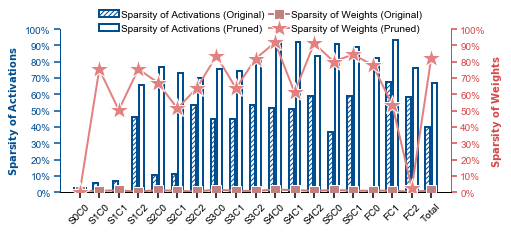

In [49]:
# Filter Pruning-Sparsity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from cls_plt_fig import cls_plt_fig

fig_name ='../generate/Filter_Pruning_Sparsity.svg'
Layers = ['S0C0','S1C0','S1C1','S1C2','S2C0','S2C1','S2C2','S3C0','S3C1','S3C2','S4C0','S4C1','S4C2','S5C0','S5C1', 
          'FC0', 'FC1', 'FC2', 'Total'] # 18
AS = [[0.0235, 0.0559, 0.0691, 0.4596, 0.1083 ,0.1139 ,0.5321 ,0.4504 ,0.4462 ,0.5366 ,0.5142 ,0.5102 ,0.5903 ,0.3709 ,0.5875 ,0.0089 ,0.6759 ,0.5843,0.401],
      [0.0235, 0.0038 ,0.0055 ,0.6563 ,0.7655 ,0.7323 ,0.6992 ,0.7578 ,0.7410 ,0.8280 ,0.9297 ,0.9192 ,0.8372 ,0.9120 ,0.8884 ,0.8227 ,0.9347 ,0.7604,0.6726
]]
WS = [[0.0104 ,0.0088 ,0.0116 ,0.0039 ,0.0135 ,0.0079 ,0.0051 ,0.0157 ,0.0090 ,0.0078 ,0.0162 ,0.0133 ,0.0087 ,0.0139 ,0.0097 ,0.0092 ,0.0107 ,0.0019,0.012],
      [0.0000 ,0.7544 ,0.5045 ,0.7554 ,0.6724 ,0.5138 ,0.6395 ,0.8368 ,0.6380 ,0.8184 ,0.9187 ,0.6127 ,0.9130 ,0.8017 ,0.8448 ,0.7795 ,0.5380 ,0.0259 ,0.826    
]]

x_value = np.arange(len(Layers))

figsize=(7,3)

bar_width = 0.25
xticks = Layers
legend_loc = (0.09, 0.95)

y_value = [AS, WS]
y_label = [r"$\bf{Sparsity\ of\ Activations}$", r"$\bf{Sparsity\ of\ Weights}$"]
y_fig_type = [['bar','bar'], ['plot','plot']]
y_legend = [['Sparsity of Activations (Original)', 'Sparsity of Activations (Pruned)'], ['Sparsity of Weights (Original)', 'Sparsity of Weights (Pruned)']]
legend_ncol = 2
y_color=[[(1,1,1),(1,1,1)], [(192/255, 129/255, 128/255), (226/255, 129/255, 128/255)]]
len_yticks = [10, 10]
y_yticks_max = [1, 1]

print(y_color[0][0])
print(y_color[1][0])
print(y_value)
print(xticks)
cls_plt_fig('').func_plt_fig(
    fig_name=fig_name,
    x_value=x_value,
    y_label = y_label,
    y_value = y_value,
    y_fig_type = y_fig_type,
    y_legend = y_legend,
    y_color = y_color,
    y_axis_color = [(0/255, 77/255, 144/255), (214/255, 73/255, 73/255)],
    y_yticks_max=y_yticks_max,
    y_yticks_min=[0, 0],
    y_edgecolor = [[(0/255, 77/255, 144/255), (0/255, 77/255, 144/255)],[]],
    y_hatch = [['/////', None],[None, None]],
    y_linestyle=[['-' for i in range(np.shape(y_value)[1])] for j in range(np.shape(y_value)[0])],
    y_marker = [[],['s','*']],
    len_yticks=len_yticks,
    xticks= xticks,
    legend_loc =legend_loc,
    figsize=figsize, #[0, 0, 1, 1],
    font_size = 10,
    plt_text = False,
    legend_ncol=legend_ncol,
    PercentFormatter= True,
    labelrotation = 45,
    bar_width = bar_width,
    linewidth= 2,
    bar_gap_width = 0.1
)


(1, 1, 1)
(0.8862745098039215, 0.5058823529411764, 0.5019607843137255)
[[array([9.83040000e-05, 1.04857600e-03, 1.83500800e-02, 3.35544320e-02,
       2.09715200e-03, 3.51272960e-02, 6.71088640e-02, 4.19430400e-03,
       6.86817280e-02, 1.34217728e-01, 8.38860800e-03, 1.35790592e-01,
       2.68435456e-01, 1.68755200e-02, 1.67772160e-02, 2.62144000e-04,
       1.31072000e-04, 1.02400000e-05]), array([9.8304000e-05, 2.6214400e-04, 9.1750400e-03, 3.6700160e-03,
       1.7664000e-04, 4.7185920e-03, 9.2405760e-03, 1.9046400e-04,
       6.6846720e-03, 4.5219840e-03, 5.4144000e-05, 4.7738880e-03,
       1.0684416e-02, 3.8361600e-04, 6.6880000e-04, 1.2160000e-05,
       1.6384000e-05, 5.1200000e-06])], [array([9.60000e-05, 2.04800e-03, 1.12000e-03, 2.04800e-03, 8.19200e-03,
       4.28800e-03, 8.19200e-03, 3.27680e-02, 1.67680e-02, 3.27680e-02,
       1.31072e-01, 6.63040e-02, 1.31072e-01, 2.63680e-01, 2.62144e-01,
       2.62144e-01, 1.31072e-01, 1.02400e-02]), array([9.6000e-05, 5.1200e-04

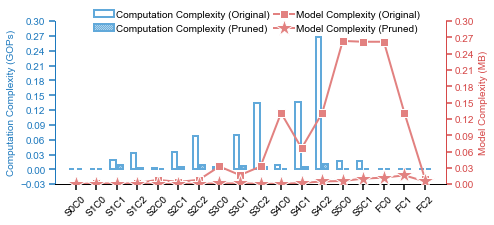

In [26]:
# Filter Pruning-Computation_Model_Complexity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from cls_plt_fig import cls_plt_fig

fig_name ='../generate/Filter_Pruning_Computation_Model_Complexity.svg'
Layers = ['S0C0','S1C0','S1C1','S1C2','S2C0','S2C1','S2C2','S3C0','S3C1','S3C2','S4C0','S4C1','S4C2','S5C0','S5C1', 
          'FC0', 'FC1', 'FC2'] # 18
CC = [np.array([
98304 ,
1048576, 
18350080, 
33554432 ,
2097152 ,
35127296 ,
67108864 ,
4194304 ,
68681728 ,
134217728 ,
8388608 ,
135790592, 
268435456 ,
16875520 ,
16777216 ,
262144 ,
131072 ,
10240 

])/1000000000,np.array([
98304 ,
262144 ,
9175040 ,
3670016 ,
176640 ,
4718592 ,
9240576 ,
190464 ,
6684672 ,
4521984 ,
54144 ,
4773888, 
10684416, 
383616 ,
668800 ,
12160 ,
16384 ,
5120 
])/1000000000]
MC = [np.array([
96 ,
2048, 
1120 ,
2048 ,
8192 ,
4288 ,
8192 ,
32768 ,
16768 ,
32768 ,
131072 ,
66304 ,
131072 ,
263680 ,
262144 ,
262144 ,
131072 ,
10240 

])/1000000,np.array([
96 ,
512 ,
560 ,
224 ,
690 ,
576 ,
1128 ,
1488 ,
1632 ,
1104 ,
846 ,
2331 ,
5217 ,
5994 ,
10450 ,
12160 ,
16384 ,
5120 
  
])/1000000]

x_value = np.arange(len(Layers))

figsize=(7,3)

bar_width = 0.25
xticks = Layers
legend_loc = (0.09, 0.90)

y_value = [CC, MC]
y_label = ['Computation Complexity (GOPs)', 'Model Complexity (MB)']
y_fig_type = [['bar','bar'], ['plot','plot']]
y_legend = [['Computation Complexity (Original)', 'Computation Complexity (Pruned)'], ['Model Complexity (Original)', 'Model Complexity (Pruned)']]
legend_ncol = 2
y_color=[[(1,1,1),(1,1,1)], [(226/255, 129/255, 128/255), (226/255, 129/255, 128/255)]]
len_yticks = [11, 10]
y_yticks_max = [0.3, 0.3]

print(y_color[0][0])
print(y_color[1][0])
print(y_value)
print(xticks)
cls_plt_fig('').func_plt_fig(
    fig_name=fig_name,
    x_value=x_value,
    y_label = y_label,
    y_value = y_value,
    y_fig_type = y_fig_type,
    y_legend = y_legend,
    y_color = y_color,
    y_axis_color = [(29/255, 121/255, 190/255), (214/255, 73/255, 73/255)],
    y_yticks_max=y_yticks_max,
    y_yticks_min=[-0.03, 0],
    y_edgecolor = [[(97/255, 169/255, 218/255), (97/255, 169/255, 218/255)],[]],
    y_hatch = [[None, '////////////'],[None, None]],
    y_marker = [[],['s', '*']],
    y_markersize=8,
    y_linestyle=[['-' for i in range(np.shape(y_value)[1])] for j in range(np.shape(y_value)[0])],
    len_yticks=len_yticks,
    xticks= xticks,
    legend_loc =legend_loc,
    figsize=figsize, #[0, 0, 1, 1],
    font_size = 10,
    plt_text = False,
    legend_ncol=legend_ncol,
    labelrotation = 45,
    bar_width = bar_width,
    linewidth= 2,
    bar_gap_width = 0.1
)


0.0 12.22454845905304 6.11227422952652 0.10667931009003738 0.9943151568199526 0.10647708165663125
12.22454845905304 12.442744025029242 12.33364624204114 0.2152627356998434 0.9769203065012594 0.21360410751079995
12.442744025029242 237.56539607886225 125.00407005194575 2.1817326008000926 -0.5736346240305089 0.8191112977571343
237.56539607886225 240.30352093745023 238.93445850815624 4.170192997437105 -0.5160182641084949 -0.8565775803197604
240.30352093745023 355.67502953577787 297.98927523661405 5.200893988510519 0.4693062822840822 -0.883035454219531
355.67502953577787 359.99999534804374 357.8375124419108 6.245442779257518 0.9992878353388335 -0.037733567865077956


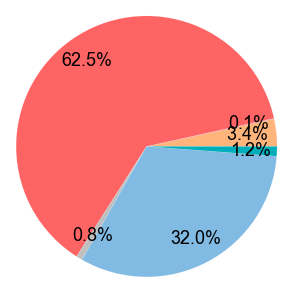

In [54]:
# Area & Energy Breakdown

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
case = 'Energy'

if case == 'Area':
    # top-level
    fig_name = '../generate/Area_Breakdown.svg'
    startangle = 40
    area = np.array([202975, 4072, 504270, 32366, 1064248, 9660])
elif case == 'Energy':
    # intra-PE
    fig_name = '../generate/Energy_Breakdown.svg'
    startangle= 0
    area = np.array([2261206.05, 40360.19, 41641511.07, 506477.93, 21340562.00,800000])

fontsize = 18
radius = 1.2
loc_legend = (-0.07,-0.25)
legend = ['Sampling', 'Grouping', 'Convolution', 'Pooling', 'Memory','Other'] #(Control, Interface, etc.)

colors = [(255/255, 180/255, 123/255), 
          (180/255,102/255, 182/255),
          (255/255, 100/255, 100/255),
          (191/255, 191/255, 191/255),
          (129/255, 186/255, 226/255),
          (0/255,173/255,186/255)]

labels = ['{:.1f}% '.format(area[0]/sum(area)*100), 
          '{:.1f}%'.format(area[1]/sum(area)*100), 
          '{:.1f}%'.format(area[2]/sum(area)*100), 
          '{:.1f}%'.format(area[3]/sum(area)*100), 
          '{:.1f}%'.format(area[4]/sum(area)*100),
           '{:.1f}%'.format(area[5]/sum(area)*100) 
]
plt.subplots(figsize=(5, 5))
# 绘制圆环图，并返回饼块对象
wedges, texts = plt.pie(area, colors=colors, startangle=startangle, radius=radius, wedgeprops={'linewidth': 0.1, 'edgecolor': "white"})

kw = dict(zorder=10, va="center", ha="center")

for i, p in enumerate(wedges):
    # 根据matplotlib.patches.Wedge对象的theta1和theta2参数计算饼块均分点的角度
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    # 根据角度的弧度计算 饼块均分点的坐标（引导线的起点）
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    print(p.theta1, p.theta2, ang, np.deg2rad(ang), x, y)
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    # 设置引导线的连接方式
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    plt.annotate(
        labels[i],
        xy=(radius*x*0.8, radius*y*0.8),
        xytext=(radius*x*0.8, radius*y*0.8),#(radius* np.sign(x)*1.2, y),
        # horizontalalignment=horizontalalignment,
        **kw,
        
        fontsize=fontsize
        # **kw
    )

# plt.legend(wedges, legend, loc=loc_legend, ncol=2, fontsize=fontsize, frameon=False, handletextpad=0.1,columnspacing=5 )
plt.savefig(fig_name, format='svg')
plt.show()


(1, 1, 1)
(0.8862745098039215, 0.5058823529411764, 0.5019607843137255)
[[[0.0235, 0.0559, 0.0691, 0.4596]], [[0.0104, 0.0088, 0.0116, 0.0039]]]
['Baseline', 'Filter', 'Filter+Block', 'Filter+Block+Fusion']
[0 1 2 3] ['Baseline', 'Filter', 'Filter+Block', 'Filter+Block+Fusion']


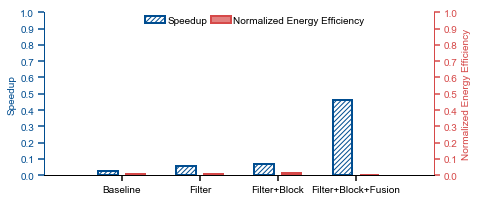

In [36]:
# Technique Effect

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from cls_plt_fig import cls_plt_fig

fig_name ='../generate/Technique.svg'
Techniques = ['Baseline','Filter','Filter+Block','Filter+Block+Fusion'] # 18
Speedup = [[0.0235, 0.0559, 0.0691, 0.4596]]
NEE = [[0.0104 ,0.0088 ,0.0116 ,0.0039]]

x_value = np.arange(len(Techniques))

figsize=(7,3)

bar_width = 0.25
xticks = Techniques
legend_loc = (0.25, 0.90)

y_value = [Speedup, NEE]
y_label = ['Speedup', 'Normalized Energy Efficiency']
y_fig_type = [['bar'], ['bar']]
y_legend = [['Speedup'], ['Normalized Energy Efficiency']]
legend_ncol = 2
y_color=[[(1,1,1),(1,1,1)], [(226/255, 129/255, 128/255), (226/255, 129/255, 128/255)]]
len_yticks = [10, 10]
y_yticks_max = [1, 1]

print(y_color[0][0])
print(y_color[1][0])
print(y_value)
print(xticks)
cls_plt_fig('').func_plt_fig(
    fig_name=fig_name,
    x_value=x_value,
    y_label = y_label,
    y_value = y_value,
    y_fig_type = y_fig_type,
    y_legend = y_legend,
    y_color = y_color,
    y_axis_color = [(0/255, 77/255, 144/255), (214/255, 73/255, 73/255)],
    y_yticks_max=y_yticks_max,
    y_yticks_min=[0, 0],
    y_edgecolor = [[(0/255, 77/255, 144/255), (97/255, 169/255, 218/255)],[(214/255, 73/255, 73/255)]],
    y_hatch = [['/////', None],[None, None]],
    y_linestyle=[['-' for i in range(np.shape(y_value)[1])] for j in range(np.shape(y_value)[0])],
    y_marker = [[],['s','*']],
    len_yticks=len_yticks,
    xticks= xticks,
    legend_loc =legend_loc,
    figsize=figsize, #[0, 0, 1, 1],
    font_size = 10,
    plt_text = False,
    legend_ncol=legend_ncol,
    PercentFormatter= False,
    labelrotation = 0,
    bar_width = bar_width,
    linewidth= 2,
    bar_gap_width = 0.1
)


In [ ]:
# Layer Enhance




(0.3803921568627451, 0.6627450980392157, 0.8549019607843137)
(0.8862745098039215, 0.5058823529411764, 0.5019607843137255)
[[array([ 44.4       ,   3.46875   ,   4.11111111,   1.        ,
         5.84210526, 620.11173184])], [array([  1.        ,   6.58047985,  22.12904729,   1.74703005,
         4.82180294, 101.73538318])]]
['Point-X', 'PNNPU', 'DSPU', '[7]', '[8]', 'This Work']
[0 1 2 3 4 5] ['Point-X', 'PNNPU', 'DSPU', '[7]', '[8]', 'This Work']


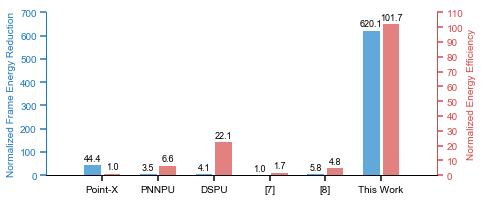

In [3]:
# Comparsion with SOTA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from cls_plt_fig import cls_plt_fig

y1_yticks_max = 12
y2_yticks_max = 12
fig_name ='../generate/SOTA.svg'
work = ['Point-X', 
             'PNNPU', 
             'DSPU',  
             '[7]', 
             '[8]', 
             'This Work']
frame_energy_reduction = 11.1/np.array([0.25, 3.2, 2.7, 11.1, 1.9, 0.0179])
energy_efficiency = np.array([0.8586, 5.65, 19, 1.5, 4.14, 87.35])/0.8586

x_value = np.arange(len(work))
# x_label = "${Works}$"

bar_width = 0.3
xticks = work
legend_loc = (0.01, 0.8)
len_yticks = [7, 11]
y2_label = "Normalized Energy Efficiency"
y2_legend = "Normalized Energy Efficiency"
y1_legend = ['Normalized Frame Energy Reduction']
y1_value = [frame_energy_reduction]
y2_value =[energy_efficiency]
y2_legend = ['Normalized Energy Efficiency']
y1_label = 'Normalized Frame Energy Reduction'

figsize=(7,3)

bar_width = 0.3
y1_yticks_max = 700
y2_yticks_max = 110

y_value = [y1_value, y2_value]
y_label = [y1_label, y2_label]
y_fig_type = [['bar'], ['bar']]
y_legend = [y1_legend, y2_legend]
legend_ncol = 2
y_color=[[(97/255, 169/255, 218/255)], [(226/255, 129/255, 128/255)]]
y_yticks_max = [y1_yticks_max, y2_yticks_max]

print(y_color[0][0])
print(y_color[1][0])
print(y_value)
print(xticks)
cls_plt_fig('').func_plt_fig(
    fig_name=fig_name,
    x_value=x_value,
    y_label = y_label,
    y_value = y_value,
    y_fig_type = y_fig_type,
    y_legend = y_legend,
    y_color = y_color,
    y_axis_color = [(29/255, 121/255, 190/255), (214/255, 73/255, 73/255)],
    y_yticks_max=y_yticks_max,
    y_yticks_min=[0, 0],
    len_yticks=len_yticks,
    xticks= xticks,
    legend_loc =legend_loc,
    figsize=figsize, #[0, 0, 1, 1],
    font_size = 10,
    plt_text = True,
    legend_ncol=legend_ncol,
    labelrotation = 0,
    bar_width = bar_width,
    bar_gap_width = 0.05
)